# PROJECT 1

## Movie Recommendation

### Submitted By : Vivek Giri

Recommendation systems are a type of information filtering system that enhance the quality of search results by presenting items that are more relevant to the user's query or aligned with their search history.


Recommendation systems are designed to predict a user’s interest in an item or the rating they might give it. These systems have become an integral part of many leading tech companies, including YouTube, Amazon, and Netflix. They are also widely implemented across social media and e-commerce platforms to provide users with personalized suggestions that match their preferences more accurately and effectively.

With the enormous volume of content available online, a major challenge is identifying what content is most relevant to each individual user. Recommendation systems help solve this problem by continuously analyzing user behavior and preferences to deliver the most suitable content. This ensures a more tailored and engaging user experience.

This project presents an overview of recommendation systems, along with the techniques and approaches commonly used to build them.


The goal of this project is to provide a recommendation system for video content providers to predict whether someone will enjoy a movie based on how much they liked or disliked other movies.

### There are basically three types of recommender systems:-

**Demographic Filtering :** recommends popular and highly rated movies to users with similar demographic profiles, such as age or location. It's easy to implement but offers generalized suggestions, as it doesn't account for individual preferences.

**Content-Based Filtering :** recommends items based on their attributes—like genre, director, or cast in the case of movies. It analyzes a user's preferences and suggests similar items, assuming that if a user liked one item, they'll likely enjoy others with similar features.


**Collaborative Filtering:**  recommends movies by analyzing user preferences and identifying others with similar viewing histories. It doesn’t rely on item metadata, but instead matches users with similar tastes to suggest what one user liked to another with similar interests.

In [1]:
## Import Libraries
import pandas as pd 
import numpy as np 
dfCredits=pd.read_csv('/Users/vivekgiri/Downloads/ml-latest-small/credits.csv')
dfMovies=pd.read_csv('/Users/vivekgiri/Downloads/ml-latest-small/movies.csv')

dfCredits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [2]:
dfMovies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


The credits dataset contains the following features:-

* movie_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.

The Movie dataset has the following features:- 

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average -  average ratings the movie recieved.
* vote_count - the count of votes recieved.




In [3]:
## Joining both Datasets

dfCredits.columns = ['id','title','cast','crew']
dfMovies= dfMovies.merge(dfCredits,on='id')

In [4]:
dfMovies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# **Demographic Filtering** -
Before building the recommendation system:

* We need a metric to score or rate each movie
* Calculate the score for every movie
* Sort the scores and recommend the highest-rated movies to users

While using the average rating as a score might seem like a good idea, it can be misleading. For example, a movie with a 9.0 average rating based on only 10 votes shouldn't necessarily rank higher than a movie with an 8.0 rating based on 60 votes.

To address this, we use IMDb’s weighted rating (WR) formula, which balances both the average rating and the number of votes a movie has received:

![](https://image.ibb.co/jYWZp9/wr.png)
where,
* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(**vote_count**) and R (**vote_average**) and C can be calculated as 

In [5]:
C= dfMovies['vote_average'].mean()
C

6.092171559442011

##### The average (mean) rating across all movies is approximately 6 out of 10. The next step is to define m, the minimum number of votes required for a movie to be considered for the top chart. To ensure quality, we'll set this threshold at the 90th percentile—meaning only movies that have more votes than at least 90% of all movies will qualify.

In [6]:
m= dfMovies['vote_count'].quantile(0.95)
m

3040.8999999999996

Now, we can filter out the movies that qualify for the chart 

In [7]:
filtered_movies = dfMovies.copy().loc[dfMovies['vote_count'] >= m]
filtered_movies.shape

(241, 23)

A total of 481 movies meet the criteria and qualify for inclusion in our list. Now, we need to calculate the weighted rating for each of these movies. To do this, we'll define a function called weighted_rating() and create a new feature called score, which will store the calculated values. We'll apply this function to our DataFrame containing the qualified movies to compute their scores.

In [8]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [9]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
filtered_movies['score'] = filtered_movies.apply(weighted_rating, axis=1)

let's sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [10]:
#Sort movies based on score calculated above
filtered_movies = filtered_movies.sort_values('score', ascending=False)

#Print the top 15 movies
filtered_movies[['original_title', 'vote_count', 'vote_average', 'score']].head(10)

,original_title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,7.848921
65,The Dark Knight,12002,8.2,7.773906
662,Fight Club,9413,8.3,7.760909
96,Inception,13752,8.1,7.736417
3232,Pulp Fiction,8428,8.3,7.714609
95,Interstellar,10867,8.1,7.660997
809,Forrest Gump,7927,8.2,7.615595
3337,The Godfather,5893,8.4,7.614467
329,The Lord of the Rings: The Return of the King,8064,8.1,7.550188
262,The Lord of the Rings: The Fellowship of the Ring,8705,8.0,7.506082


Under the **Trending Now** tab of these systems we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

Text(0.5, 1.0, 'Popular Movies')

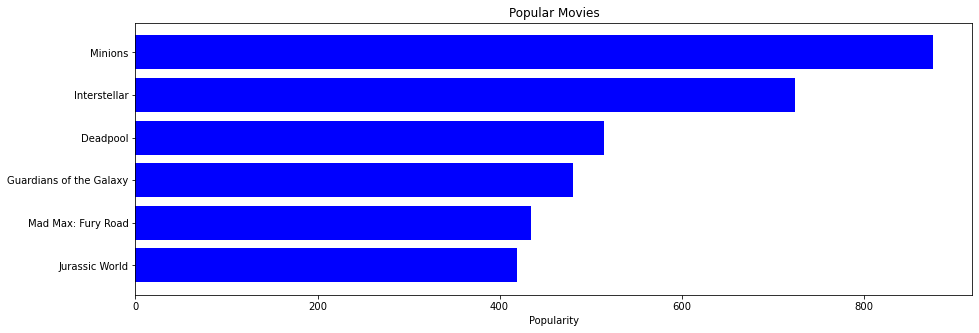

In [11]:
pop= dfMovies.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))

plt.barh(pop['original_title'].head(6),pop['popularity'].head(6), align='center',
        color= 'blue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


The above demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user.
In the following section we will do Content Basesd Filtering. 

# **Content Based Filtering**
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

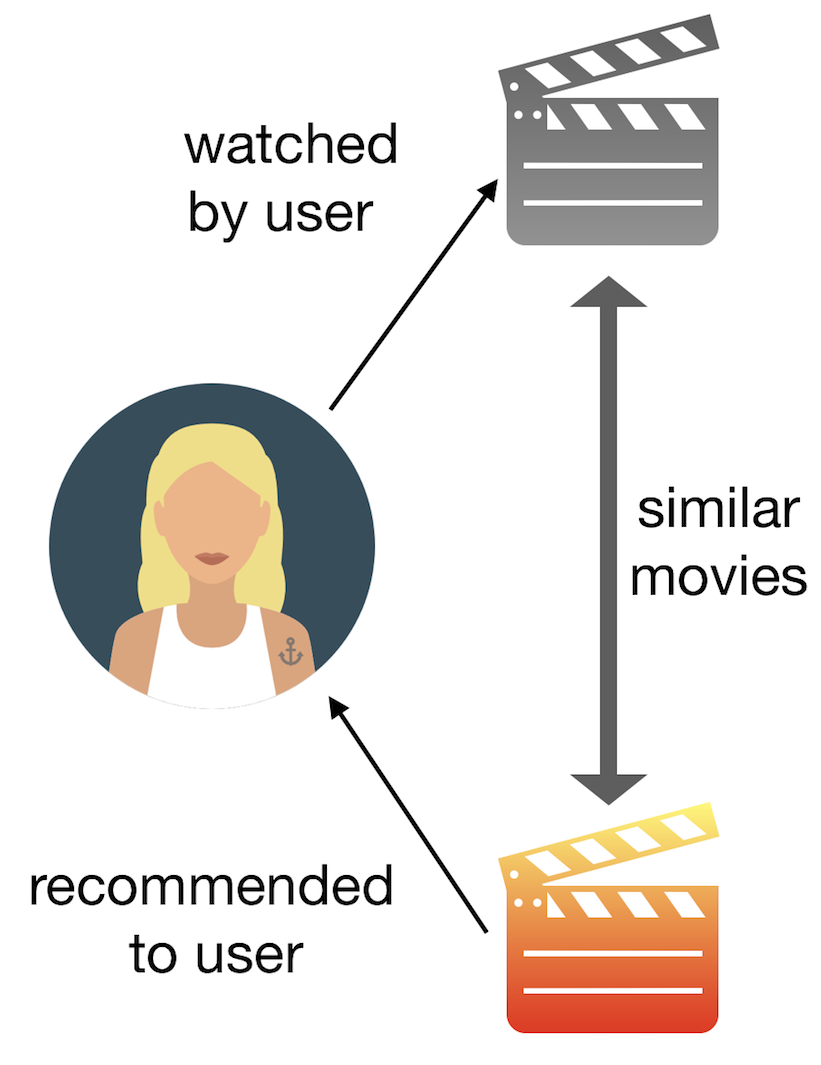

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score.

In [12]:
dfMovies['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

We will compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.
 Term Frequency : **(term instances/total instances)**.
Inverse Document Frequency : **log(number of documents/documents with term)**

The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

This process generates a matrix where each row represents a movie and each column corresponds to a unique word from the overview vocabulary. It helps reduce the weight of commonly used words, making the similarity calculations more meaningful.

We'll use Scikit-learn’s TfidfVectorizer to create the TF-IDF matrix.

In [13]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
dfMovies['overview'] = dfMovies['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(dfMovies['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

We will now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will use cosine similarity to compute a numerical value that represents the similarity between two movies. This method is ideal because it is independent of vector magnitude and is both efficient and easy to calculate. The mathematical formula for cosine similarity is:

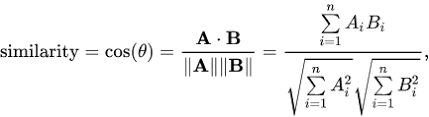

In [14]:
# Import linear_kernel
# we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We will define a function that takes a movie title as input and returns a list of the 10 most similar movies. To do this, we need a reverse mapping of movie titles to their corresponding indices in the metadata DataFrame. This allows us to efficiently locate the index of a given movie based on its title.

In [15]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(dfMovies.index, index=dfMovies['original_title']).drop_duplicates()


To build our movie recommender system, we’ll follow these steps:

1) Retrieve the index of the movie based on its title.

2) Compute cosine similarity scores between the selected movie and all others. Convert these scores into a list of tuples, where each tuple contains the movie index and its corresponding similarity score.

3) Sort the list of tuples in descending order based on the similarity score (i.e., the second element of each tuple).

4) Select the top 10 most similar movies, excluding the first one, as it represents the movie itself.

5) Return the movie titles corresponding to the indices of these top results.

In [16]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return dfMovies['original_title'].iloc[movie_indices]

In [17]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: original_title, dtype: object

In [18]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: original_title, dtype: object

As we see, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

## **Improving Recommender System**
To improve the quality of our recommender system, we’ll incorporate richer metadata. This includes the top 3 actors, the director, the genres, and the plot keywords of each movie.

From the cast, crew, and keywords features, we’ll extract:

The three most prominent actors

The director

The associated plot keywords for each movie

In [19]:
# Parse the stringified features into their corresponding python objects

from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    dfMovies[feature] = dfMovies[feature].apply(literal_eval)

Next, we'll write functions that will help us to extract the required information from each feature.

In [20]:
# Get the director's name from the crew feature. If director is not listed, return NaN

def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [21]:
# Returns the list top 3 elements or entire list; whichever is more.

def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [22]:
# Define new director, cast, genres and keywords features that are in a suitable form.

dfMovies['director'] = dfMovies['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    dfMovies[feature] = dfMovies[feature].apply(get_list)

In [23]:
# Print the new features of the first 3 films

dfMovies[['original_title', 'cast', 'director', 'keywords', 'genres']].head(3)

,original_title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them.

In [24]:
# Function to convert all strings to lower case and strip names of spaces

def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [25]:
# Apply clean_data function to your features.

features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    dfMovies[feature] = dfMovies[feature].apply(clean_data)

Now we will create a string that contains all the metadata that we want to feed to our vectorizer (namely actors, director and keywords).

In [26]:
def create_metadata(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
dfMovies['soup'] = dfMovies.apply(create_metadata, axis=1)

The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the **CountVectorizer()** instead of TF-IDF. This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies.

In [27]:
# Import CountVectorizer and create the count matrix

from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(dfMovies['soup'])

In [28]:
# Compute the Cosine Similarity matrix based on the count_matrix

from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [29]:
# Reset index of our main DataFrame and construct reverse mapping as before

dfMovies = dfMovies.reset_index()
indices = pd.Series(dfMovies.index, index=dfMovies['original_title'])

We can now reuse our **get_recommendations()** function by passing in the new **cosine_sim2** matrix as your second argument.

In [30]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: original_title, dtype: object

In [31]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: original_title, dtype: object

With richer metadata, our recommender now provides more accurate and relevant movie suggestions. We can further improve it by giving more weight to key features, like the director, by repeating them in the metadata.

# **Collaborative Filtering**

The content-based engine recommends movies similar to a given title but cannot capture individual preferences or suggest across genres. It also lacks personalization—every user gets the same results for the same movie, regardless of their unique tastes.

To address this, we now move to Collaborative Filtering, which makes personalized recommendations based on user behavior. Collaborative Filtering is generally of two types:

*  **User based filtering**-  User-Based Collaborative Filtering is a technique used to predict the items that a user might like on the basis of ratings given to that item by the other users who have similar taste with that of the target user.
Many websites use collaborative filtering for building their recommendation system.
Imagine that we want to recommend a movie to our friend Stanley. We could assume that similar people will have similar taste. Suppose that me and Stanley have seen the same movies, and we rated them all almost identically. But Stanley hasn’t seen ‘The Godfather: Part II’ and I did. If I love that movie, it sounds logical to think that he will too. With that, we have created an artificial rating based on our similarity.
Well, UB-CF uses that logic and recommends items by finding similar users to the active user (to whom we are trying to recommend a movie). A specific application of this is the user-based Nearest Neighbor algorithm. This algorithm needs two tasks:
 - Find the K-nearest neighbors (KNN) to the user a, using a similarity function w to measure the distance between each pair of users:

 - Predict the rating that user a will give to all items the k neighbors have consumed but a has not. We Look for the item j with the best predicted rating.
In other words, we are creating a User-Item Matrix, predicting the ratings on items the active user has not see, based on the other similar users. This technique is memory-based.

Although computing user-based CF is very simple, it suffers from several problems. One main issue is that users’ preference can change over time. It indicates that precomputing the matrix based on their neighboring users may lead to bad performance. To tackle this problem, we can apply item-based CF.

* **Item Based Collaborative Filtering** - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as opposed to the horizontal manner that user-based CF does.


It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. 


In [32]:
## We'll be using the Surprise library to implement SVD

from surprise import Reader, Dataset, SVD
reader = Reader()
ratings = pd.read_csv('MovieData/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Note that in this dataset movies are rated on a scale of 5 unlike the earlier one.

In [33]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [34]:
from surprise.model_selection import cross_validate
svd = SVD()
cross_validate(svd, data, measures=['RMSE', 'MAE'],cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8716  0.8705  0.8752  0.8819  0.8692  0.8737  0.0046  
MAE (testset)     0.6713  0.6678  0.6725  0.6807  0.6669  0.6719  0.0049  
Fit time          3.72    3.81    3.98    3.81    3.71    3.81    0.10    
Test time         0.08    0.08    0.15    0.08    0.08    0.09    0.03    


{'test_rmse': array([0.87159403, 0.8704737 , 0.87519704, 0.88187468, 0.86923716]),
 'test_mae': array([0.67133657, 0.66783667, 0.67253652, 0.68072232, 0.66692237]),
 'fit_time': (3.7249982357025146,
  3.8081789016723633,
  3.9810123443603516,
  3.812917947769165,
  3.7060279846191406),
 'test_time': (0.0784142017364502,
  0.07996010780334473,
  0.15488266944885254,
  0.0817861557006836,
  0.07721495628356934)}

We get a mean Root Mean Sqaure Error of 0.89 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [35]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Let us pick user with user Id 2  and check the ratings she/he has given.

In [36]:
ratings[ratings['userId'] == 2]

,userId,movieId,rating,timestamp
232,2,318,3.0,1445714835
233,2,333,4.0,1445715029
234,2,1704,4.5,1445715228
235,2,3578,4.0,1445714885
236,2,6874,4.0,1445714952
237,2,8798,3.5,1445714960
238,2,46970,4.0,1445715013
239,2,48516,4.0,1445715064
240,2,58559,4.5,1445715141
241,2,60756,5.0,1445714980


In [37]:
svd.predict(2, 258, 3)

Prediction(uid=2, iid=258, r_ui=3, est=3.1660491666492803, details={'was_impossible': False})

For the movie with ID 258, the system predicts a rating of **2.99.** This collaborative filtering model makes predictions based solely on user rating patterns, not the actual content of the movie. It relies on how other users rated the movie, regardless of what the movie is about. 

## **Conclusion** 

We create recommenders using demographic, content-based, and collaborative filtering. While demographic filtering is too basic for practical use, **Hybrid Systems** combine content-based and collaborative filtering, as these two approaches are highly complementary and enhance each other’s effectiveness.